<a href="https://colab.research.google.com/github/ishaak15/UNSW-IDS-Feature-Selection/blob/main/Training_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn import datasets, preprocessing, feature_extraction, neighbors
from sklearn import linear_model, svm, metrics, ensemble, tree, ensemble
from sklearn.model_selection import train_test_split
from copy import copy
import urllib
import csv

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # "Support Vector Classifier" 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from zipfile import ZipFile
import collections

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [2]:
!git clone https://github.com/ishaak15/UNSW-IDS-Feature-Selection.git

Cloning into 'UNSW-IDS-Feature-Selection'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 76 (delta 17), reused 0 (delta 0), pack-reused 37
Unpacking objects: 100% (76/76), done.
Checking out files: 100% (22/22), done.


In [3]:
cd UNSW-IDS-Feature-Selection/

/content/UNSW-IDS-Feature-Selection


In [4]:
ls

bayes_10.sav   clfKNN_all.sav                      Testset1.csv
bayes_20.sav   Copy_of_Training_and_Testing.ipynb  Testset2.csv
bayes_all.sav  Dataset1.csv                        Testset3.csv
clfDT_10.sav   Dataset2.csv                        Training_and_Testing.ipynb
clfDT_20.sav   Dataset3.csv                        UNSW_IDS_analysis.ipynb
clfDT_all.sav  LICENSE                             UNSW_NB15_testing-set.csv
clfKNN10.sav   Models_Training_and_Testing.ipynb
clfKNN20.sav   README.md


In [5]:
df1 = pd.read_csv('Dataset1.csv',index_col=0)
df2 = pd.read_csv('Dataset2.csv',index_col=0)
df3 = pd.read_csv('Dataset3.csv',index_col=0)

In [6]:
tf1 = pd.read_csv('Testset1.csv',index_col=0)
tf2 = pd.read_csv('Testset2.csv',index_col=0)
tf3 = pd.read_csv('Testset3.csv',index_col=0)

In [7]:
df1_xtrain=df1.iloc[: , :-1]
df1_ytrain=df1.iloc[:,-1]
df2_xtrain=df2.iloc[: , :-1]
df2_ytrain=df2.iloc[:,-1]
df3_xtrain=df3.iloc[: , :-1]
df3_ytrain=df3.iloc[:,-1]

In [8]:
df1_xtest=tf1.iloc[: , :-1]
df1_ytest=tf1.iloc[:,-1]
df2_xtest=tf2.iloc[: , :-1]
df2_ytest=tf2.iloc[:,-1]
df3_xtest=tf3.iloc[: , :-1]
df3_ytest=tf3.iloc[:,-1]

In [9]:
#KNN

In [10]:
clfKNN10=neighbors.KNeighborsClassifier()
clfKNN10.fit(df1_xtrain,df1_ytrain)
#clfKNN10.fit(df1_xtrain,df1_ytrain)

print ("\t\tKNN Classification of UNSW-NB15\n\n\t\tTop 15 Features ")

yt_pred_10 = clfKNN10.predict(df1_xtest)
results = confusion_matrix(df1_ytest, yt_pred_10) 
print ('Confusion Matrix :')
print(results) 


accKNN10=accuracy_score(df1_ytest,yt_pred_10)
print("Accuracy: ",accKNN10)
preKNN10=precision_score(df1_ytest, yt_pred_10, average='macro')
print("Precision Score: ",preKNN10)
f1KNN10=f1_score(df1_ytest, yt_pred_10, average='macro')
print("F1 Score: ",f1KNN10)
reKNN10=recall_score(df1_ytest, yt_pred_10, average='macro')  
print("Recall: ",reKNN10)


		KNN Classification of UNSW-NB15

		Top 15 Features 
Confusion Matrix :
[[  208   131    42    58   129    16    32    61     0     0]
 [  198   121    13    49   134    18    16    33     1     0]
 [  822   758   472   913   502    21   202   372    27     0]
 [  955   835   503  6664   944    39   616   540    33     3]
 [  444   315    97   469  3357    54  1111   164    50     1]
 [   17    11    34   375   168 18078   140    44     4     0]
 [  496    52   218  1986  7076    20 26822   233    93     4]
 [   82   102    51   324   117     5    71  2737     5     2]
 [    5     7    12    50   161     6    51    32    54     0]
 [    0     1     2    26    11     0     3     0     0     1]]
Accuracy:  0.7107078657144246
Precision Score:  0.41756373950870634
F1 Score:  0.4023931552335053
Recall:  0.44140047486900985


In [11]:
clfKNN20=neighbors.KNeighborsClassifier()
clfKNN20.fit(df2_xtrain,df2_ytrain)

print ("\t\tKNN Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

y_pred_20 = clfKNN20.predict(df2_xtest)
results = confusion_matrix(df2_ytest, y_pred_20) 
print ('Confusion Matrix :')
print(results) 


accKNN20=accuracy_score(df2_ytest,y_pred_20)
print("Accuracy: ",accKNN20)
preKNN20=precision_score(df2_ytest, y_pred_20, average='macro')
print("Precision Score: ",preKNN20)
f1KNN20=f1_score(df2_ytest, y_pred_20, average='macro')
print("F1 Score: ",f1KNN20)
reKNN20=recall_score(df2_ytest, y_pred_20, average='macro')  
print("Recall: ",reKNN20)


		KNN Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[  267   167    15    69   117    16    17     9     0     0]
 [  251   109     6    65   118    18    11     5     0     0]
 [ 1150  1136   184   646   494    22   307   129    21     0]
 [ 1321  1139   396  4316  1854    39  1749   290    28     0]
 [  599   332   140  2053  1702    56  1023   122    35     0]
 [   30    22    26   304   220 18083   132    51     3     0]
 [  132    71   537  7955  4981    21 22760   473    69     1]
 [  126   152    91   985   400     7   405  1325     5     0]
 [    7     6    13   109   126     5    52    17    43     0]
 [    0     0     1    22     8     0    13     0     0     0]]
Accuracy:  0.5925885439440315
Precision Score:  0.3273066113090913
F1 Score:  0.3053129978339978
Recall:  0.336096541715301


In [12]:
clfKNN20=neighbors.KNeighborsClassifier()
clfKNN20.fit(df3_xtrain,df3_ytrain)

print ("\t\tKNN Analysis of UNSW-NB15\n\n\t\tAll Features ")

y_pred_all = clfKNN20.predict(df3_xtest)
results = confusion_matrix(df3_ytest, y_pred_all) 
print ('Confusion Matrix :')
print(results) 


accKNNall=accuracy_score(df3_ytest, y_pred_all)
print("Accuracy: ",accKNNall)
preKNNall=precision_score(df3_ytest, y_pred_all, average='macro')
print("Precision Score: ",preKNNall)
f1KNNall=f1_score(df3_ytest, y_pred_all, average='macro')
print("F1 Score: ",f1KNNall)
reKNNall=recall_score(df3_ytest, y_pred_all, average='macro')  
print("Recall: ",reKNNall)


		KNN Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  336   161     1    44   101    16    17     1     0     0]
 [  304    98     1    44   105    18    11     2     0     0]
 [ 1491  1070   101   581   437    22   305    61    21     0]
 [ 1671  1073   319  4245  1794    39  1743   220    28     0]
 [  726   307   123  2007  1672    56  1024   112    35     0]
 [   37    21    26   301   219 18083   130    51     3     0]
 [  115    55   537  7955  5009    21 22765   473    69     1]
 [  164   146    81   981   392     7   405  1315     5     0]
 [    6     3    13   109   132     5    50    16    44     0]
 [    0     0     1    22     8     0    13     0     0     0]]
Accuracy:  0.5910095710051985
Precision Score:  0.3265665197965294
F1 Score:  0.3034833731074776
Recall:  0.34123127222810123


In [13]:
#Decision TREE

In [14]:
clfDT_10 = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tTop 15 Features ")

# Train Decision Tree Classifer
clfDT_10 = clfDT_10.fit(df1_xtrain,df1_ytrain)

#Predict the response for test dataset
y_pred_DT10 = clfDT_10.predict(df1_xtest)


#print ("\t\tMajor Verifcation")
results_DT10 = confusion_matrix(df1_ytest, y_pred_DT10) 
print ('Confusion Matrix :')
print(results_DT10) 


accDT10=accuracy_score(df1_ytest, y_pred_DT10)
preDT10=precision_score(df1_ytest, y_pred_DT10, average='macro')
f1DT10=f1_score(df1_ytest, y_pred_DT10, average='macro')
reDT10=recall_score(df1_ytest, y_pred_DT10, average='macro')

print ('Accuracy Score :',accDT10 )
print("Precision Score: ",preDT10)
print("F1 Score: ",f1DT10)
print("Recall: ",reDT10)



		Decision Tree Analysis of UNSW-NB15

		Top 15 Features 
Confusion Matrix :
[[  378    82     0     5   185     0    26     1     0     0]
 [  316    57     3     8   186     1     7     0     5     0]
 [ 1481  1023   532   518   375    34    64    25    36     1]
 [ 1696   935   609  6535   632   104   256   236   116    13]
 [  719   139   176   511  2872    42  1334     1   265     3]
 [   18    27    70   224    48 18435    20     6    17     6]
 [  603    11   733  1092  7318   191 26877    24   150     1]
 [  158   147    39   269    47     5    35  2760    36     0]
 [    1     5    13    51    28     4    13     3   260     0]
 [    0     0     0    13     0     1     1     0     1    28]]
Accuracy Score : 0.7133799737647574
Precision Score:  0.49458955772290425
F1 Score:  0.49328463219267105
Recall:  0.5664007522419929


In [17]:
clfDT_20 = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

# Train Decision Tree Classifer
clfDT_20 = clfDT_20.fit(df2_xtrain,df2_ytrain)

#Predict the response for test dataset
y_pred_DT20 = clfDT_20.predict(df2_xtest)

#print ("\t\tMajor Verifcation")
results_DT20 = confusion_matrix(df2_ytest, y_pred_DT20) 
print ('Confusion Matrix :')
print(results_DT20)

accDT20=accuracy_score(df2_ytest, y_pred_DT20)
preDT20=precision_score(df2_ytest, y_pred_DT20, average='macro')
f1DT20=f1_score(df2_ytest, y_pred_DT20, average='macro')
reDT20=recall_score(df2_ytest, y_pred_DT20, average='macro')

print ('Accuracy Score :',accDT20 )
print("Precision Score: ",preDT20)
print("F1 Score: ",f1DT20)
print("Recall: ",reDT20)

		Decision Tree Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[  505   113     0    38     1     3    13     1     3     0]
 [  493    50     3    13    10     0     9     0     5     0]
 [ 1745  1029   546   511    95    33    67    27    36     0]
 [ 2105   944   707  6458   179   112   296   227    94    10]
 [ 1071   155    97   393  2664    20  1480    15   167     0]
 [   25    24    50   195    38 18493    20     7    14     5]
 [  667    13  1275  1476  7420    76 25880    37   155     1]
 [  168   135    34   275    27    14    34  2760    48     1]
 [    2     2    13    45    28     2    20     4   262     0]
 [    0     0     1    15     0     1     0     1     1    25]]
Accuracy Score : 0.7001287470242433
Precision Score:  0.49770948752772937
F1 Score:  0.4932439421719807
Recall:  0.5715024436336368


In [18]:
clfDT_all = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tAll Features ")

# Train Decision Tree Classifer
clfDT_all = clfDT_all.fit(df3_xtrain,df3_ytrain)

#Predict the response for test dataset
y_pred_DTall = clfDT_all.predict(df3_xtest)

#print ("\t\tMajor Verifcation")
results_DTall = confusion_matrix(df3_ytest, y_pred_DTall) 
print ('Confusion Matrix :')
print(results_DTall)

accDTall=accuracy_score(df3_ytest, y_pred_DTall)
preDTall=precision_score(df3_ytest, y_pred_DTall, average='macro')
f1DTall=f1_score(df3_ytest, y_pred_DTall, average='macro')
reDTall=recall_score(df3_ytest, y_pred_DTall, average='macro')

print ('Accuracy Score :', accDTall)
print("Precision Score: ",preDTall)
print("F1 Score: ",f1DTall)
print("Recall: ",reDTall)

		Decision Tree Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  499   114     1    52     1     2     6     0     2     0]
 [  491    66     2     7     5     0     7     0     5     0]
 [ 1694  1133   538   505    58    40    62    22    37     0]
 [ 2059  1063   527  6523   154   100   378   226    95     7]
 [ 1053   192    81   337  2737    28  1475     6   153     0]
 [   24    24    60   247    36 18430    25     3    17     5]
 [  680    11   142   755  7509    37 27688    44   131     3]
 [  164   168    36   282    18     2    25  2758    42     1]
 [    0     7    10    52    31     4    13     4   257     0]
 [    0     0     5    13     1     1     0     1     0    23]]
Accuracy Score : 0.722914541126172
Precision Score:  0.5244416835000998
F1 Score:  0.5024372217227197
Recall:  0.5735803113270536


In [30]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
print(df1_ytrain.unique())

[6 1 0 4 8 7 3 2 9 5]


In [31]:
bayes_10 = MultinomialNB()
#bayes_10.partial_fit(df1_xtrain,df1_ytrain,df1_ytrain.unique())
bayes_10.fit(df1_xtrain,df1_ytrain)

print ("\t\tMultinomial Naive Bayes Analysis of UNSW-NB15\n\n\t\tTop 15 Features ")
y_pred_gnb10 = bayes_10.predict(df1_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df1_ytest, y_pred_gnb10) 
print ('Confusion Matrix :')
print(results) 

accbayes_10=accuracy_score(df1_ytest, y_pred_gnb10) 
prebayes_10=precision_score(df1_ytest, y_pred_gnb10, average='macro')
f1bayes_10=f1_score(df1_ytest, y_pred_gnb10, average='macro')
rebayes_10=recall_score(df1_ytest, y_pred_gnb10, average='macro')

print ('Accuracy Score :',accbayes_10)
print("Precision Score: ",prebayes_10)
print("F1 Score: ",f1bayes_10)
print("Recall: ",rebayes_10)


		Multinomial Naive Bayes Analysis of UNSW-NB15

		Top 15 Features 
Confusion Matrix :
[[  601     0     0    14     0     1    61     0     0     0]
 [  483     0     0    38     1     2    59     0     0     0]
 [ 2473     0     0   510    72    78   934    10    12     0]
 [ 2697     0     0  1738   125    56  6494     2    20     0]
 [ 1222     0     0   752   550   374  3111     7    46     0]
 [   28     0     0   109    95 18159   475     1     4     0]
 [  193     0     1  4062  1501  2792 28284    18   149     0]
 [ 1541     0     0    68     8    15  1858     6     0     0]
 [   75     0     0     1    36     9   192     6    59     0]
 [    0     0     0     2     4     2    36     0     0     0]]
Accuracy Score : 0.5999732789194967
Precision Score:  0.23827456767032631
F1 Score:  0.2239561902839405
Recall:  0.30190991296773395


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [32]:
bayes_20 = MultinomialNB()
bayes_20.fit(df2_xtrain,df2_ytrain)

print ("\t\tMultinomial Naive Bayes Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

y_pred_gnb20 = bayes_20.predict(df2_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df2_ytest, y_pred_gnb20) 
print ('Confusion Matrix :')
print(results)

accbayes_20=accuracy_score(df2_ytest, y_pred_gnb20) 
prebayes_20=precision_score(df2_ytest, y_pred_gnb20, average='macro')
f1bayes_20=f1_score(df2_ytest, y_pred_gnb20, average='macro')
rebayes_20=recall_score(df2_ytest, y_pred_gnb20, average='macro')

print ('Accuracy Score :',accbayes_20)
print("Precision Score: ",prebayes_20)
print("F1 Score: ",f1bayes_20)
print("Recall: ",rebayes_20)

		Multinomial Naive Bayes Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[    3     0     2    40     0   614     0     0     0    18]
 [    3     0    10    36     0   515     4     0     0    15]
 [   31     0    87   677     0  2903    17     0     0   374]
 [   36     0   128  5200     0  3163    76     0     0  2529]
 [   45     0    54  2445     0  2250     0     0     0  1268]
 [    4     0     4   345     0 18343     4     0     0   171]
 [  585     0    73 14651     0  5965  7847     1     1  7877]
 [    8     0    22  1262     0  1601     0     0     0   603]
 [    0     0     0   130     0   185     0     0     0    63]
 [    0     0     0    24     0     6     0     0     0    14]]
Accuracy Score : 0.3825244133508235
Precision Score:  0.1947161142507347
F1 Score:  0.135809387243145
Recall:  0.19951131812748615


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [33]:
bayes_all = MultinomialNB()
bayes_all.fit(df3_xtrain,df3_ytrain)

print ("\t\tMultinomial Naive Bayes Analysis of UNSW-NB15\n\n\t\tAll Features ")
y_pred_gnball = bayes_all.predict(df3_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df3_ytest, y_pred_gnball) 
print ('Confusion Matrix :')
print(results)

accbayes_all=accuracy_score(df3_ytest, y_pred_gnball)
prebayes_all=precision_score(df3_ytest, y_pred_gnball, average='macro')
f1bayes_all=f1_score(df3_ytest, y_pred_gnball, average='macro')
rebayes_all=recall_score(df3_ytest, y_pred_gnball, average='macro')

print ('Accuracy Score :', accbayes_all)
print("Precision Score: ",prebayes_all)
print("F1 Score: ",f1bayes_all)
print("Recall: ",rebayes_all)

		Multinomial Naive Bayes Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[    3     0     2    40     0   614     0     0     0    18]
 [    3     0    10    36     0   515     4     0     0    15]
 [   31     0    87   677     0  2903    17     0     0   374]
 [   36     0   128  5200     0  3163    76     0     0  2529]
 [   45     0    54  2445     0  2250     0     0     0  1268]
 [    4     0     4   345     0 18343     4     0     0   171]
 [  615     0    14 14654     0  6027  7813     1     1  7875]
 [    8     0    22  1262     0  1601     0     0     0   603]
 [    0     0     0   130     0   185     0     0     0    63]
 [    0     0     0    24     0     6     0     0     0    14]]
Accuracy Score : 0.38211145119759027
Precision Score:  0.1988094523267321
F1 Score:  0.13564830638485165
Recall:  0.19941942623559425


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#Random Forest Classifier 


In [34]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tTop 15 Features ")

#Create a Gaussian Classifier
clfRF_10=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_10.fit(df1_xtrain,df1_ytrain)

y_pred_RF10=clfRF_10.predict(df1_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_10 = confusion_matrix(df1_ytest, y_pred_RF10) 
print ('Confusion Matrix :')
print(results_10) 

accclfRF_10=accuracy_score(df1_ytest, y_pred_RF10)
preclfRF_10=precision_score(df1_ytest, y_pred_RF10, average='macro')
f1clfRF_10=f1_score(df1_ytest, y_pred_RF10, average='macro')
reclfRF_10=recall_score(df1_ytest, y_pred_RF10, average='macro')

print ('Accuracy Score :',accclfRF_10 )
print("Precision Score: ",preclfRF_10)
print("F1 Score: ",f1clfRF_10)
print("Recall: ",reclfRF_10)

		Random Forest Analysis of UNSW-NB15

		Top 15 Features 
Confusion Matrix :
[[   37   152    11    66   348     0    28    32     3     0]
 [   25   104     8    30   367     0    15    28     6     0]
 [  356  1399   509   873   709    12    33   154    43     1]
 [  355  1338   203  7578  1115    13   146   303    76     5]
 [   87   298    21   433  3935     6   964    63   255     0]
 [    5    10    42   407    54 18319     9     3    19     3]
 [  318     0    60   708  7384     6 28389    13   121     1]
 [   44   175    27   340    86     0    15  2784    25     0]
 [    0     1    12    51    31     0    10     4   268     1]
 [    0     0     0    18     1     1     1     0     0    23]]
Accuracy Score : 0.7523927512996161
Precision Score:  0.5416255238192631
F1 Score:  0.5071133425112915
Recall:  0.5453466445684136


In [35]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

#Create a Gaussian Classifier
clfRF_20=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_20.fit(df2_xtrain,df2_ytrain)

y_pred_RF20=clfRF_20.predict(df2_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_20 = confusion_matrix(df2_ytest, y_pred_RF20) 
print ('Confusion Matrix :')
print(results_20)

accclfRF_20=accuracy_score(df2_ytest, y_pred_RF20) 
preclfRF_20=precision_score(df2_ytest, y_pred_RF20, average='macro')
f1clfRF_20=f1_score(df2_ytest, y_pred_RF20, average='macro')
reclfRF_20=recall_score(df2_ytest, y_pred_RF20, average='macro')

print ('Accuracy Score :',accclfRF_20)
print("Precision Score: ",preclfRF_20)
print("F1 Score: ",f1clfRF_20)
print("Recall: ",reclfRF_20)

		Random Forest Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[   71   242    22    59   216     1    16    47     3     0]
 [   71   170    22    30   230     1     3    50     6     0]
 [  363  1616   528   822   545    13    14   142    46     0]
 [  419  1582   184  7639   837    24    89   291    63     4]
 [  171   441    46   401  3775     2   919    97   210     0]
 [    7     9    41   364    57 18359     3     7    21     3]
 [  401     2    43   726  7500     6 28188     5   128     1]
 [   39   192    24   315    75     2    10  2818    21     0]
 [    0     1    10    54    45     0     7     1   259     1]
 [    0     0     0    28     2     1     1     0     0    12]]
Accuracy Score : 0.7508502161978332
Precision Score:  0.5365441326615858
F1 Score:  0.4915661364413994
Recall:  0.5333231038932129


In [36]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tAll Features ")

#Create a Random Forest Classifier
clfRF_all=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_all.fit(df3_xtrain,df3_ytrain)

y_pred_RFall=clfRF_all.predict(df3_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_all = confusion_matrix(df3_ytest, y_pred_RFall) 
print ('Confusion Matrix :')
print(results_all)

accclfRF_all=accuracy_score(df3_ytest, y_pred_RFall) 
preclfRF_all=precision_score(df3_ytest, y_pred_RFall, average='macro')
f1clfRF_all=f1_score(df3_ytest, y_pred_RFall, average='macro')
reclfRF_all=recall_score(df3_ytest, y_pred_RFall, average='macro')

print ('Accuracy Score :',accclfRF_all)
print("Precision Score: ",preclfRF_all)
print("F1 Score: ",f1clfRF_all)
print("Recall: ",reclfRF_all)

		Random Forest Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[   53   249    13    66   245     1    15    32     3     0]
 [   52   164    16    40   270     1     0    34     6     0]
 [  296  1742   467   774   606    12    10   137    45     0]
 [  346  1695   130  7613   906    23    82   263    70     4]
 [  127   443    34   382  3908     4   876    67   221     0]
 [    2     8    35   397    57 18335     4    10    20     3]
 [  453     0    34   718  7631     5 28023     7   128     1]
 [   32   210    19   309    80     2     6  2807    31     0]
 [    0     0     7    58    40     0     6     1   265     1]
 [    0     0     0    32     1     1     2     0     0     8]]
Accuracy Score : 0.748712529757567
Precision Score:  0.5316193733514087
F1 Score:  0.4780045335061504
Recall:  0.5217124047589466


In [ ]:
#Logistic Regression Classifier 


In [ ]:
print ("\t\tLogistic Regression Analysis of UNSW-NB15\n\n\t\tTop 15 Features ")

logisticRegr_10 = LogisticRegression(C=1e5, solver='newton-cg',max_iter=1000, multi_class='multinomial')

logisticRegr_10.fit(df1_xtrain,df1_ytrain)

y_pred_LR10 = logisticRegr_10.predict(df1_xtest)

results_LR10 = confusion_matrix(df1_ytest, y_pred_LR10) 
print ('Confusion Matrix :')
print(results_LR10) 

acclogisticRegr_10=accuracy_score(df1_ytest, y_pred_LR10)
prelogisticRegr_10=precision_score(df1_ytest, y_pred_LR10, average='macro')
f1logisticRegr_10=f1_score(df1_ytest, y_pred_LR10, average='macro')
relogisticRegr_10=recall_score(df1_ytest, y_pred_LR10, average='macro')

print ('Accuracy Score :',acclogisticRegr_10 )
print("Precision Score: ",prelogisticRegr_10)
print("F1 Score: ",f1logisticRegr_10)
print("Recall: ",relogisticRegr_10)

		Logistic Regression Analysis of UNSW-NB15

		Top 10 Features 


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix :
[[    0     0     0    67   603     1     4     2     0     0]
 [    0     0     0    30   534     2    10     7     0     0]
 [    0     0     0   701  3023    53   229    83     0     0]
 [    0     0     4  5355  4777    36   873    87     0     0]
 [    0     0     0   190  4906   347   574    45     0     0]
 [    0     0     0   244   520 17912   186     9     0     0]
 [    0     0     0  4280 10600  2693 19298   129     0     0]
 [    0     0     0   118  3345    19     6     8     0     0]
 [    0     0     0    17   343     6     0    12     0     0]
 [    0     0     0     0    33     2     9     0     0     0]]
Accuracy Score : 0.576677355098868
Precision Score:  0.24395420989882374
F1 Score:  0.2330576404871651
Recall:  0.2763386674857679


In [ ]:
print ("\t\tLogistic Regression Analysis of UNSW NB15\n\n\t\tTop 30 Features ")

logisticRegr_20 = LogisticRegression(C=1e5, solver='newton-cg',max_iter=1000, multi_class='multinomial')

logisticRegr_20.fit(df2_xtrain,df2_ytrain)

y_pred_LR20 = logisticRegr_20.predict(df2_xtest)

results_LR20 = confusion_matrix(df2_ytest, y_pred_LR20) 
print ('Confusion Matrix :')
print(results_LR20) 

acclogisticRegr_20=accuracy_score(df2_ytest, y_pred_LR20)
prelogisticRegr_20=precision_score(df2_ytest, y_pred_LR20, average='macro')
f1logisticRegr_20=f1_score(df2_ytest, y_pred_LR20, average='macro')
relogisticRegr_20=recall_score(df2_ytest, y_pred_LR20, average='macro')

print ('Accuracy Score :',acclogisticRegr_20 )
print("Precision Score: ",prelogisticRegr_20)
print("F1 Score: ",f1logisticRegr_20)
print("Recall: ",relogisticRegr_20)


		Logistic Regression Analysis of UNSW NB15

		Top 20 Features 


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix :
[[    0     0     0    24   618     2    33     0     0     0]
 [    0     0     0    21   527     5    30     0     0     0]
 [    0     0    12   465  2920   123   568     1     0     0]
 [    0     0     3  2640  4041   122  4323     3     0     0]
 [    0     0     0  1354  3715   379   614     0     0     0]
 [    0     0     1   177   224 18168   301     0     0     0]
 [    0     0     0  4308 10244  2806 19639     3     0     0]
 [    0     0     0   425  2851    45   175     0     0     0]
 [    0     0     0    72   234    33    39     0     0     0]
 [    0     0     0    12    19     2    11     0     0     0]]
Accuracy Score : 0.5365350046154593
Precision Score:  0.27752510329555236
F1 Score:  0.20200551358150495
Recall:  0.23464537572388955


In [ ]:
print ("\t\tLogistic Regression Analysis of UNSW-NB15\n\n\t\tAll Features ")

logisticRegr_all = LogisticRegression(C=1e5, solver='newton-cg', multi_class='multinomial')

logisticRegr_all.fit(df3_xtrain,df3_ytrain)

y_pred_LRall = logisticRegr_all.predict(df3_xtest)

results_LRall = confusion_matrix(df3_ytest, y_pred_LRall) 
print ('Confusion Matrix :')
print(results_LRall)

acclogisticRegr_all=accuracy_score(df3_ytest, y_pred_LRall)
prelogisticRegr_all=precision_score(df3_ytest, y_pred_LRall, average='macro')
f1logisticRegr_all=f1_score(df3_ytest, y_pred_LRall, average='macro')
relogisticRegr_all=recall_score(df3_ytest, y_pred_LRall, average='macro')

print ('Accuracy Score :', acclogisticRegr_all)
print("Precision Score: ",prelogisticRegr_all)
print("F1 Score: ",f1logisticRegr_all)
print("Recall: ",relogisticRegr_all)


		Logistic Regression Analysis of UNSW-NB15

		Top 30 Features 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix :
[[    0     0     3     2   613     2    57     0     0     0]
 [    0     0    10    19   493     5    56     0     0     0]
 [    0     0   143   326  2577   136   907     0     0     0]
 [    0     0   146  1682  2851   126  6327     0     0     0]
 [    0     0    42   885  2071   387  2677     0     0     0]
 [    0     0    10   116   127 18168   450     0     0     0]
 [    0     0     7  3840  2397  2825 27931     0     0     0]
 [    0     0    26   179  1537    45  1709     0     0     0]
 [    0     0     0    27   150    35   166     0     0     0]
 [    0     0     0     8     4     2    30     0     0     0]]
Accuracy Score : 0.6072365544381285
Precision Score:  0.22974356478427999
F1 Score:  0.20854342565061423
Recall:  0.224534320313942


In [ ]:
#CNN 1D
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
#from sklearn.cross_validation import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
X = df1_xtrain
Y = df1_ytrain
C = df1_ytest
T = df1_xtest
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


from keras.models import Sequential
from keras import layers

input_dim = df1_xtrain.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_shape=(15, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1_m,precision_m, recall_m])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 15, 10)            20        
_________________________________________________________________
flatten_5 (Flatten)          (None, 150)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                4832      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
Total params: 5,182
Trainable params: 5,182
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyNN10 = model.fit(X_train, y_train,
                    epochs=100)

Epoch 1/100
3367/3367 [==============================] - 10s 3ms/step - loss: 1.3980 - accuracy: 0.4886 - f1_m: 0.4311 - precision_m: 0.6782 - recall_m: 0.3203
Epoch 2/100
3367/3367 [==============================] - 10s 3ms/step - loss: 1.1951 - accuracy: 0.5281 - f1_m: 0.5009 - precision_m: 0.7814 - recall_m: 0.3727
Epoch 3/100
3367/3367 [==============================] - 10s 3ms/step - loss: 1.1440 - accuracy: 0.5501 - f1_m: 0.5115 - precision_m: 0.8036 - recall_m: 0.3796
Epoch 4/100
3367/3367 [==============================] - 10s 3ms/step - loss: 1.0931 - accuracy: 0.5775 - f1_m: 0.5410 - precision_m: 0.8138 - recall_m: 0.4097
Epoch 5/100
3367/3367 [==============================] - 10s 3ms/step - loss: 1.0533 - accuracy: 0.5964 - f1_m: 0.5816 - precision_m: 0.8320 - recall_m: 0.4515
Epoch 6/100
3367/3367 [==============================] - 10s 3ms/step - loss: 1.0045 - accuracy: 0.6180 - f1_m: 0.6140 - precision_m: 0.8539 - recall_m: 0.4836
Epoch 7/100
3367/3367 [=================

In [ ]:
loss_NN10, accNN10, f1_score_NN10, precision_NN10, recall_NN10 = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy: {:.4f}".format(accNN10))
print("Testing Precision: {:.4f}".format(precision_NN10))
print("Testing Recall: {:.4f}".format(recall_NN10))
print("Testing F1-Score: {:.4f}".format(f1_score_NN10))

2573/2573 [==============================] - 7s 3ms/step - loss: 1.1713 - accuracy: 0.7194 - f1_m: 0.7037 - precision_m: 0.8235 - recall_m: 0.6463
Testing Accuracy: 0.7194
Testing Precision: 0.8235
Testing Recall: 0.6463
Testing F1-Score: 0.7037


In [ ]:
df2_xtrain.shape[1]

30

In [ ]:
X = df2_xtrain
Y = df2_ytrain
C = df2_ytest
T = df2_xtest
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


from keras.models import Sequential
from keras import layers

input_dim = df2_xtrain.shape[1]  # Number of features

model1 = Sequential()
model1.add(layers.Dense(10, input_shape=(input_dim, 1), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1_m,precision_m, recall_m])
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 30, 10)            20        
_________________________________________________________________
flatten_6 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                9632      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 9,982
Trainable params: 9,982
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyNN20 = model1.fit(X_train, y_train,
                    epochs=100)

Epoch 1/100
3367/3367 [==============================] - 10s 3ms/step - loss: 1.4399 - accuracy: 0.4881 - f1_m: 0.3436 - precision_m: 0.6399 - recall_m: 0.2620
Epoch 2/100
3367/3367 [==============================] - 10s 3ms/step - loss: 1.3525 - accuracy: 0.5059 - f1_m: 0.4016 - precision_m: 0.6503 - recall_m: 0.2979
Epoch 3/100
3367/3367 [==============================] - 10s 3ms/step - loss: 1.3474 - accuracy: 0.5058 - f1_m: 0.4008 - precision_m: 0.6643 - recall_m: 0.2932
Epoch 4/100
3367/3367 [==============================] - 10s 3ms/step - loss: 1.3445 - accuracy: 0.5036 - f1_m: 0.3887 - precision_m: 0.6982 - recall_m: 0.2764
Epoch 5/100
3367/3367 [==============================] - 10s 3ms/step - loss: 1.3272 - accuracy: 0.5056 - f1_m: 0.3950 - precision_m: 0.7235 - recall_m: 0.2776
Epoch 6/100
3367/3367 [==============================] - 10s 3ms/step - loss: 1.3184 - accuracy: 0.5079 - f1_m: 0.4090 - precision_m: 0.7683 - recall_m: 0.2860
Epoch 7/100
3367/3367 [=================

In [ ]:
loss20, accNN20, f1_score_NN20, precision_NN20, recall_NN20 = model1.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy: {:.4f}".format(accNN20))
print("Testing Precision: {:.4f}".format(precision_NN20))
print("Testing Recall: {:.4f}".format(recall_NN20))
print("Testing F1-Score: {:.4f}".format(f1_score_NN20))

2573/2573 [==============================] - 7s 3ms/step - loss: 1.0383 - accuracy: 0.5858 - f1_m: 0.4926 - precision_m: 0.7067 - recall_m: 0.4323
Testing Accuracy: 0.5858
Testing Precision: 0.7067
Testing Recall: 0.4323
Testing F1-Score: 0.4926


In [ ]:
X = df3_xtrain
Y = df3_ytrain
C = df3_ytest
T = df3_xtest
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


from keras.models import Sequential
from keras import layers

input_dim = df3_xtrain.shape[1]  # Number of features

model2 = Sequential()
model2.add(layers.Dense(10, input_shape=(input_dim, 1), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1_m,precision_m, recall_m])
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 42, 10)            20        
_________________________________________________________________
flatten_8 (Flatten)          (None, 420)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                13472     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                330       
Total params: 13,822
Trainable params: 13,822
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyNNall = model2.fit(X_train, y_train,
                    epochs=100)

In [ ]:
loss_NNall, accNNall, f1_score_NNall, precision_NNall, recall_NNall = model2.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy: {:.4f}".format(accNNall))
print("Testing Precision: {:.4f}".format(precision_NNall))
print("Testing Recall: {:.4f}".format(recall_NNall))
print("Testing F1-Score: {:.4f}".format(f1_score_NNall))

In [ ]:
#Ada Boost with DT
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
print ("\t\tAdaBoost using Decision Tree Analysis of UNSW NB15\n\n\t\tTop 15 Features ")



abc10 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME", n_estimators=500)
abc10.fit(df1_xtrain, df1_ytrain)

#Predict the response for test dataset
y_pred_Ada10 = abc10.predict(df1_xtest)


results_Ada10 = confusion_matrix(df1_ytest, y_pred_Ada10) 
print ('Confusion Matrix :')
print(results_Ada10) 

accabc10=accuracy_score(df1_ytest, y_pred_Ada10)
preabc10=precision_score(df1_ytest, y_pred_Ada10, average='macro')
f1abc10=f1_score(df1_ytest, y_pred_Ada10, average='macro')
reabc10=recall_score(df1_ytest, y_pred_Ada10, average='macro')

print ('Accuracy Score :', accabc10)
print("Precision Score: ",preabc10)
print("F1 Score: ",f1abc10)
print("Recall: ",reabc10)

		AdaBoost using Decision Tree Analysis of UNSW NB15

		Top 15 Features 
Confusion Matrix :
[[  281     4    60    51   206     0    62    13     0     0]
 [  179     6    61    97   214     1     8    13     4     0]
 [ 1862   134   237   854   525    69   168   200    38     2]
 [ 1854   155   390  6189   859   253   868   517    44     3]
 [  539    12   134   370  1076     2  3825    66    36     2]
 [   12     2    53   804    41 17845    89    15    10     0]
 [  440    23   170   908  3039    18 32249    20   127     6]
 [  216    28    22   196    78     7    87  2842    20     0]
 [    0     0    25    50    44     0    45    15   199     0]
 [    0     1     0    31     4     3     1     0     2     2]]
Accuracy Score : 0.7400038867026186
Precision Score:  0.42578770530222565
F1 Score:  0.4122602194938225
Recall:  0.4418846498278154


In [ ]:
print ("\t\tAdaBoost using DT Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

abc20 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME",n_estimators=500)
abc20.fit(df2_xtrain, df2_ytrain)

y_pred_Ada20 = abc20.predict(df2_xtest)



results_Ada10 = confusion_matrix(df2_ytest, y_pred_Ada20) 
print ('Confusion Matrix :')
print(results_Ada10) 

accabc20=accuracy_score(df2_ytest, y_pred_Ada20)
preabc20=precision_score(df2_ytest, y_pred_Ada20, average='macro')
f1abc20=f1_score(df2_ytest, y_pred_Ada20, average='macro')
reabc20=recall_score(df2_ytest, y_pred_Ada20, average='macro')

print ('Accuracy Score :', accabc20)
print("Precision Score: ",preabc20)
print("F1 Score: ",f1abc20)
print("Recall: ",reabc20)


		AdaBoost using DT Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[  424    57     3    18    44     0    55    76     0     0]
 [  359    45    15    24    51    11     4    71     3     0]
 [ 1378   689   331   926   328    32   108   252    39     6]
 [ 1640   687  1031  6096   478   219   363   553    40    25]
 [  826   133    82   151  1658    11  2933   194    53    21]
 [   13     6   260   370    56 18059    87     7    12     1]
 [  658     6   307   638  5201    27 30030    14   101    18]
 [  133   110    59   241    86     7    34  2820     5     1]
 [    0     2    36    54    45     0    36    12   193     0]
 [    0     0     5    31     2     2     2     0     0     2]]
Accuracy Score : 0.7246028275761551
Precision Score:  0.42216095049288327
F1 Score:  0.42151037141227066
Recall:  0.4736811250635452


In [ ]:
print ("\t\tAdaBoost using DT Analysis of UNSW-NB15\n\n\t\tAll Features ")

abcall = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=500)

abcall.fit(df3_xtrain,df3_ytrain)

y_pred_Adaall = abcall.predict(df3_xtest)

results_Adaall = confusion_matrix(df3_ytest, y_pred_Adaall) 
print ('Confusion Matrix :')
print(results_Adaall)

accabcall=accuracy_score(df3_ytest, y_pred_Adaall)
preabcall=precision_score(df3_ytest, y_pred_Adaall, average='macro')
f1abcall=f1_score(df3_ytest, y_pred_Adaall, average='macro')
reabcall=recall_score(df3_ytest, y_pred_Adaall, average='macro')

print ('Accuracy Score :', accabcall)
print("Precision Score: ",preabcall)
print("F1 Score: ",f1abcall)
print("Recall: ",reabcall)

		AdaBoost using DT Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  249    47   164    14    21    34    26   122     0     0]
 [  187    89   159    23    26    10     0    89     0     0]
 [  975   503   493   589   129   142   137  1121     0     0]
 [ 1494   832   956  3549   150   892  1295  1963     0     1]
 [  441   648   725  1154  1237   998   233   626     0     0]
 [   13    42    75   355     6 14064    41  4275     0     0]
 [ 2176  1236  1999  4353  5753  1290 15577  4616     0     0]
 [   85   128    52    69    20    14     2  3126     0     0]
 [    0    67    72   168     6     0     0    65     0     0]
 [    0     0     5     9     0     1     0    29     0     0]]
Accuracy Score : 0.46620997910897344
Precision Score:  0.2588463213023677
F1 Score:  0.24181574020965085
Recall:  0.3224329134995701


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
!pip install vecstack

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [ ]:
models_XGB = [
    KNeighborsClassifier(),
        
    RandomForestClassifier(n_estimators=500, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [ ]:
S_train, S_test = stacking(models_XGB, df1_xtrain, df1_ytrain, df1_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)

task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.73357156]
    fold  1:  [0.74108966]
    fold  2:  [0.73417487]
    fold  3:  [0.73937256]
    fold  4:  [0.74043995]
    ----
    MEAN:     [0.73772972] + [0.00320190]
    FULL:     [0.73772972]

model  1:     [RandomForestClassifier]
    fold  0:  [0.72651754]
    fold  1:  [0.73250418]
    fold  2:  [0.72851309]
    fold  3:  [0.73510303]
    fold  4:  [0.73023018]
    ----
    MEAN:     [0.73057360] + [0.00300194]
    FULL:     [0.73057360]

model  2:     [XGBClassifier]
    fold  0:  [0.78893633]
    fold  1:  [0.79547986]
    fold  2:  [0.79650084]
    fold  3:  [0.79961017]
    fold  4:  [0.79520141]
    ----
    MEAN:     [0.79514572] + [0.00347675]
    FULL:     [0.79514572]



In [ ]:
model_XGB1 = XGBClassifier(random_state=1, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=300, max_depth=3)
    
model_XGB1 = model_XGB1.fit(S_train, df1_ytrain)

y_pred_XGB1 = model_XGB1.predict(S_test)

print('Final prediction score: [%.5f]' % accuracy_score(df1_ytest, y_pred_XGB1))

results_XGB1 = confusion_matrix(df1_ytest, y_pred_XGB1) 
print ('Confusion Matrix :')
print(results_XGB1) 

accXGB10=accuracy_score(df1_ytest, y_pred_XGB1)
preXGB10=precision_score(df1_ytest, y_pred_XGB1, average='macro')
f1XGB10=f1_score(df1_ytest, y_pred_XGB1, average='macro')
reXGB10=recall_score(df1_ytest, y_pred_XGB1, average='macro')

print ('Accuracy Score :', accXGB10)
print("Precision Score: ",preXGB10)
print("F1 Score: ",f1XGB10)
print("Recall: ",reXGB10)

Final prediction score: [0.73438]
Confusion Matrix :
[[    1     0     0     8   613     0    52     3     0     0]
 [    1    21     1    32   513     0     7     4     4     0]
 [    8    46    68  1024  2782     2    44    46    69     0]
 [    7    29    35  7270  3222     0   305   184    78     2]
 [    1     7     1   136  4807     0   961    54    95     0]
 [    0     4    12   495   162 18159    19     9    10     1]
 [    1     0    19  1076  8717     0 27080    33    73     1]
 [    2     6     2   291   345     0     6  2829    15     0]
 [    0     1     2    57    64     0    11    30   213     0]
 [    0     0     1    22     5     0     1     0     0    15]]
Accuracy Score : 0.7343803138512365
Precision Score:  0.5647513742585343
F1 Score:  0.4708033143226628
Recall:  0.4907946234036852


In [ ]:
S_train2, S_test2 = stacking(models_XGB, df2_xtrain, df2_ytrain, df2_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)

model_XGB2 = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=300, max_depth=3)
    
model_XGB2 = model_XGB2.fit(S_train2, df2_ytrain)

y_pred_XGB2 = model_XGB2.predict(S_test2)

print('Final prediction score: [%.5f]' % accuracy_score(df2_ytest, y_pred_XGB2))




results_XGB2 = confusion_matrix(df2_ytest, y_pred_XGB2) 
print ('Confusion Matrix :')
print(results_XGB2) 

accXGB20=accuracy_score(df2_ytest, y_pred_XGB2)
preXGB20=precision_score(df2_ytest, y_pred_XGB2, average='macro')
f1XGB20=f1_score(df2_ytest, y_pred_XGB2, average='macro')
reXGB20=recall_score(df2_ytest, y_pred_XGB2, average='macro')

print ('Accuracy Score :',accXGB20 )
print("Precision Score: ",preXGB20)
print("F1 Score: ",f1XGB20)
print("Recall: ",reXGB20)



task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.56775571]
    fold  1:  [0.56798775]
    fold  2:  [0.56993689]
    fold  3:  [0.56432151]
    fold  4:  [0.57156117]
    ----
    MEAN:     [0.56831260] + [0.00243047]
    FULL:     [0.56831260]

model  1:     [RandomForestClassifier]
    fold  0:  [0.69890477]
    fold  1:  [0.70985706]
    fold  2:  [0.71380174]
    fold  3:  [0.71816410]
    fold  4:  [0.72410433]
    ----
    MEAN:     [0.71296640] + [0.00847543]
    FULL:     [0.71296640]

model  2:     [XGBClassifier]
    fold  0:  [0.79394839]
    fold  1:  [0.80165213]
    fold  2:  [0.79974940]
    fold  3:  [0.80466865]
    fold  4:  [0.80230184]
    ----
    MEAN:     [0.80046408] + [0.00361752]
    FULL:     [0.80046408]

Final prediction score: [0.73699]
Confusion Matrix :
[[   77   215     0     1   322     0    57     2     3     0]
 [   25

In [ ]:

S_train3, S_test3 = stacking(models_XGB, df3_xtrain, df3_ytrain, df3_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)


model_XGB3 = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=300, max_depth=3)
    
model_XGB3 = model_XGB3.fit(S_train3, df3_ytrain)

y_pred_XGB3 = model_XGB3.predict(S_test)

print('Final prediction score: [%.5f]' % accuracy_score(df3_ytest, y_pred_XGB3))




results_XGB3 = confusion_matrix(df3_ytest, y_pred_XGB3) 
print ('Confusion Matrix :')
print(results_XGB3)

accXGBall=accuracy_score(df3_ytest, y_pred_XGB3)
preXGBall=precision_score(df3_ytest, y_pred_XGB3, average='macro')
f1XGBall=f1_score(df3_ytest, y_pred_XGB3, average='macro')
reXGBall=recall_score(df3_ytest, y_pred_XGB3, average='macro')

print ('Accuracy Score :', accXGBall)
print("Precision Score: ",preXGBall)
print("F1 Score: ",f1XGBall)
print("Recall: ",reXGBall)

task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.56682755]
    fold  1:  [0.56585298]
    fold  2:  [0.56835901]
    fold  3:  [0.56283646]
    fold  4:  [0.57040097]
    ----
    MEAN:     [0.56685539] + [0.00252940]
    FULL:     [0.56685539]

model  1:     [RandomForestClassifier]
    fold  0:  [0.69760535]
    fold  1:  [0.70400965]
    fold  2:  [0.70447373]
    fold  3:  [0.70707258]
    fold  4:  [0.70563393]
    ----
    MEAN:     [0.70375905] + [0.00325381]
    FULL:     [0.70375905]

model  2:     [XGBClassifier]
    fold  0:  [0.79227771]
    fold  1:  [0.79956376]
    fold  2:  [0.79942454]
    fold  3:  [0.80517913]
    fold  4:  [0.79933172]
    ----
    MEAN:     [0.79915537] + [0.00409532]
    FULL:     [0.79915537]

Final prediction score: [0.72781]
Confusion Matrix :
[[  138     0     0     8   479     0    48     4     0     0]
 [   91

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
"""
level0 = list()
level0.append(('rf', RandomForestClassifier()))
#level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
# define meta learner model
print("Proceeding with: ",level0)
level1 = GradientBoostingClassifier(n_estimators=200)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
# fit the model on all available data
model.fit(df1_xtrain, df1_ytrain)
# make a prediction for one example

yhat = model.predict(df1_xtest)
#print('Predicted Class: %d' % (yhat))

print('Final prediction score: [%.5f]' % accuracy_score(df1_ytest, yhat))

results_sc1 = confusion_matrix(df1_ytest, yhat) 
print ('Confusion Matrix :')
print(results_sc1) 

print ('Accuracy Score :',accuracy_score(df1_ytest, yhat) )
print("Precision Score: ",precision_score(df1_ytest, yhat, average='macro'))
print("F1 Score: ",f1_score(df1_ytest, yhat, average='macro'))
print("Recall: ",recall_score(df1_ytest, yhat, average='macro'))
"""

Final prediction score: [0.67519]
Confusion Matrix :
[[   67   183    39   176   194     7     3     5     3     0]
 [   23   207    38   119   167     7     6     4    12     0]
 [  520   527   793  1071   882    31    74   137    54     0]
 [  504   655   491  7815  1055    37   101   352   122     0]
 [   87   363   119   654  4138    17   331    21   332     0]
 [   12    16    41   427   178 18005   140     3    48     1]
 [ 1449     4    51   854 12999     6 21445     5   186     1]
 [   64    51    68   304   116     1    12  2829    51     0]
 [    1     1    14    38    29     2     2     1   290     0]
 [    0     1     0    38     2     1     0     0     1     1]]
Accuracy Score : 0.6751931205363649
Precision Score:  0.489997169317403
F1 Score:  0.44466007373387406
Recall:  0.5165441831566977


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

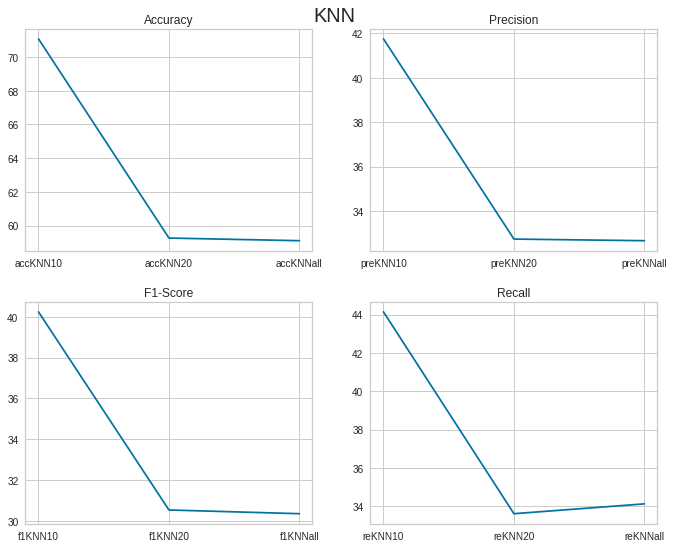

In [28]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['accKNN10', 'accKNN20', 'accKNNall'],[accKNN10*100,accKNN20*100,accKNNall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['preKNN10','preKNN20','preKNNall'],[preKNN10*100,preKNN20*100,preKNNall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['f1KNN10','f1KNN20','f1KNNall'],[f1KNN10*100,f1KNN20*100,f1KNNall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['reKNN10','reKNN20','reKNNall'],[reKNN10*100,reKNN20*100,reKNNall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('KNN',fontsize=20)

plt.show()

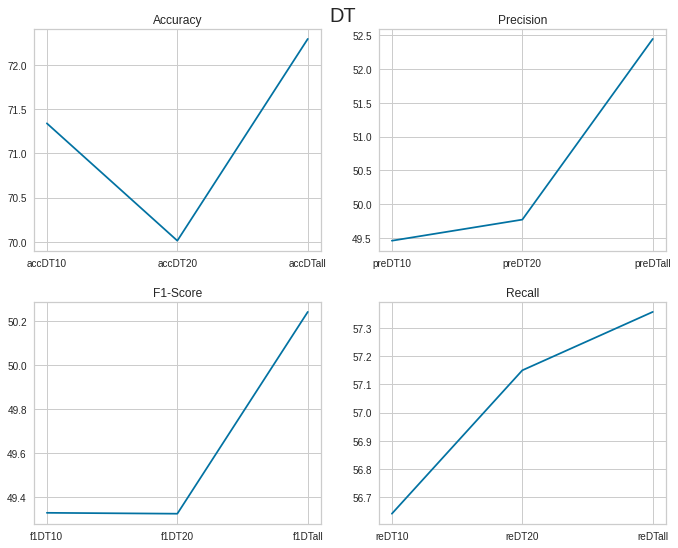

In [29]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['accDT10', 'accDT20', 'accDTall'],[accDT10*100,accDT20*100,accDTall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['preDT10','preDT20','preDTall'],[preDT10*100,preDT20*100,preDTall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['f1DT10','f1DT20','f1DTall'],[f1DT10*100,f1DT20*100,f1DTall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['reDT10','reDT20','reDTall'],[reDT10*100,reDT20*100,reDTall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('DT',fontsize=20)

plt.show()

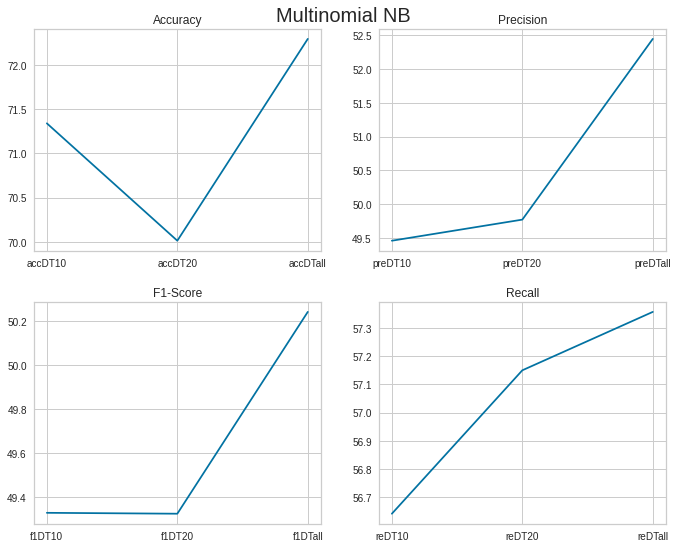

In [37]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['accDT10', 'accDT20', 'accDTall'],[accDT10*100,accDT20*100,accDTall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['preDT10','preDT20','preDTall'],[preDT10*100,preDT20*100,preDTall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['f1DT10','f1DT20','f1DTall'],[f1DT10*100,f1DT20*100,f1DTall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['reDT10','reDT20','reDTall'],[reDT10*100,reDT20*100,reDTall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Multinomial Naive Bayes',fontsize=20)

plt.show()

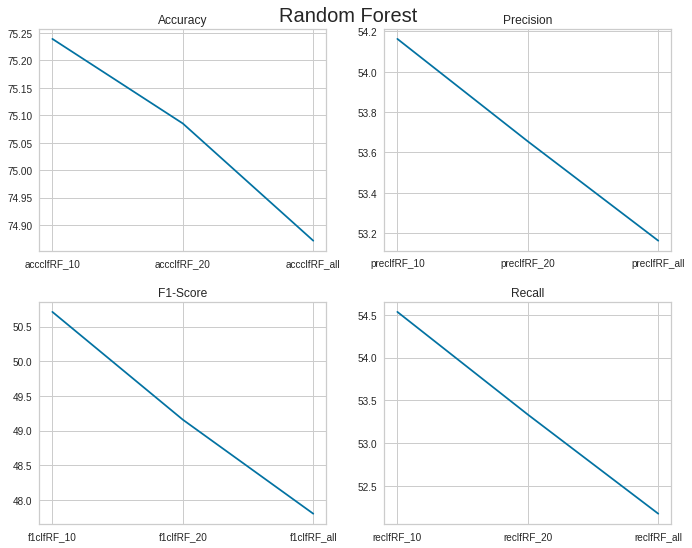

In [38]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['accclfRF_10', 'accclfRF_20', 'accclfRF_all'],[accclfRF_10*100,accclfRF_20*100,accclfRF_all*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['preclfRF_10','preclfRF_20','preclfRF_all'],[preclfRF_10*100,preclfRF_20*100,preclfRF_all*100])
a[0][1].set_title('Precision')
a[1][0].plot(['f1clfRF_10','f1clfRF_20','f1clfRF_all'],[f1clfRF_10*100,f1clfRF_20*100,f1clfRF_all*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['reclfRF_10','reclfRF_20','reclfRF_all'],[reclfRF_10*100,reclfRF_20*100,reclfRF_all*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Random Forest',fontsize=20)

plt.show()

In [ ]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['accNN10', 'accNN20', 'accNNall'],[accNN10*100,accNN20*100,accNNall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['precision_NN10','precision_NN20','precision_NNall'],[precision_NN10*100,precision_NN20*100,precision_NNall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['f1_score_NN10','f1_score_NN20','f1_score_NNall'],[f1_score_NN10*100,f1_score_NN20*100,f1_score_all*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['recall_NN10','recall_NN20','recall_NNall'],[recall_NN10*100,recall_NN20*100,recall_NNall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Convolution Neural Network',fontsize=20)

plt.show()

In [ ]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['accabc10', 'accabc20', 'accabcall'],[accabc10*100,accabc20*100,accabcall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['preabc10','preabc20','preabcall'],[preabc10*100,preabc20*100,preabcall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['f1abc10','f1abc20','f1abcall'],[f1abc10*100,f1abc20*100,f1abcall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['reabc10','reabc20','reabcall'],[reabc10*100,reabc20*100,reabcall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Adaboost with Decision Tree',fontsize=20)

plt.show()

In [ ]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['accXGB10', 'accXGB20', 'accXGBall'],[accXGB10*100,accXGB20*100,accXGBall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['preXGB10','preXGB20','preXGBall'],[preXGB10*100,preXGB20*100,preXGBall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['f1XGB10','f1XGB20','f1XGBall'],[f1XGB10*100,f1XGB20*100,f1XGBall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['reXGB10','reXGB20','reXGBall'],[reXGB10*100,reXGB20*100,reXGBall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Stack: KNN,RF, XGBoost',fontsize=20)

plt.show()

In [ ]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['accXGB10', 'accXGB20', 'accXGBall'],[accXGB10*100,accXGB20*100,accXGBall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['preXGB10','preXGB20','preXGBall'],[preXGB10*100,preXGB20*100,preXGBall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['f1XGB10','f1XGB20','f1XGBall'],[f1XGB10*100,f1XGB20*100,f1XGBall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['reXGB10','reXGB20','reXGBall'],[reXGB10*100,reXGB20*100,reXGBall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Logistic Regression Classifier',fontsize=20)

plt.show()